In [44]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [46]:
dataset_path = r"\Users\User\OneDrive\Desktop\Tumor CLF CNN"

train_dir = os.path.join(dataset_path, r"\Users\User\OneDrive\Desktop\Tumor CLF CNN\Training")
test_dir = os.path.join(dataset_path, r"\Users\User\OneDrive\Desktop\Tumor CLF CNN\Testing")

categories = ["glioma", "meningioma", "notumor", "pituitary"]

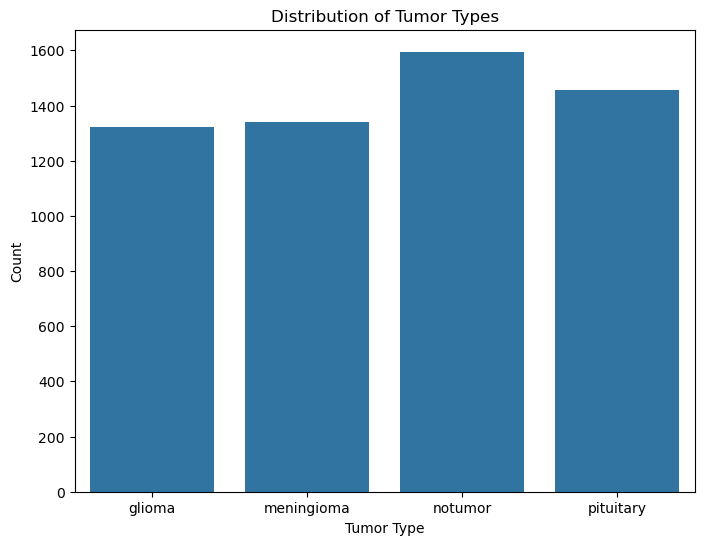

In [48]:
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()


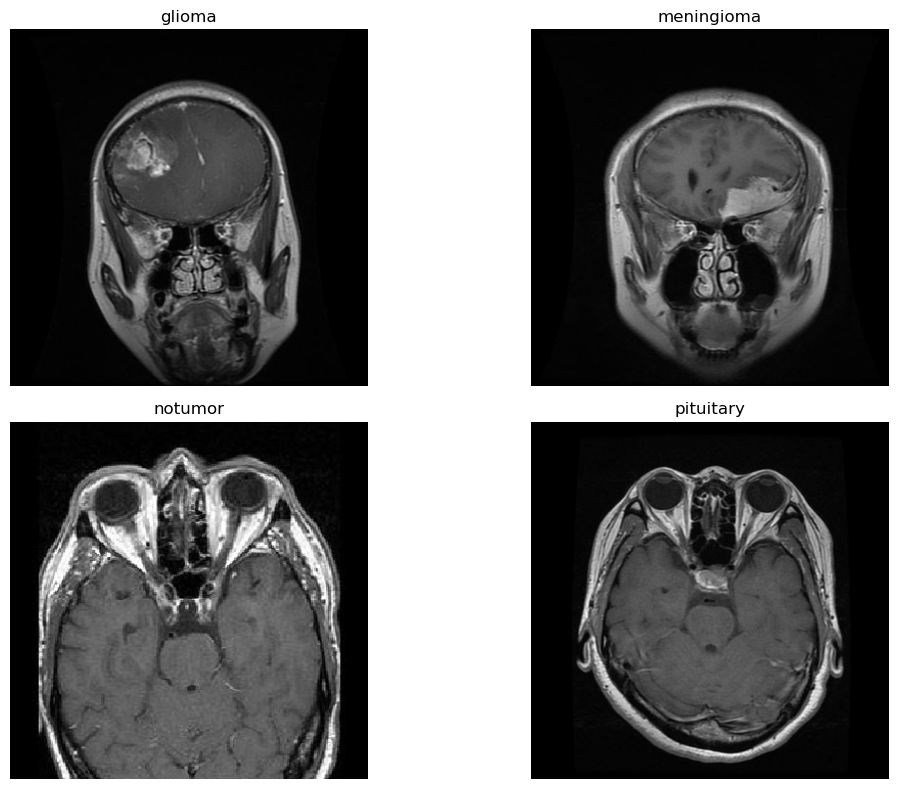

In [50]:
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [52]:
image_size = (150, 150)
batch_size = 32
epochs = 50

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(image_size[0], image_size[1], 3)),  
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [56]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator), 
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator),  
    verbose=1 
)

Epoch 1/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 131s 697ms/step - accuracy: 0.4244 - loss: 1.2140 - val_accuracy: 0.5934 - val_loss: 1.0868
Epoch 2/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50


C:\Users\User\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


179/179 ━━━━━━━━━━━━━━━━━━━━ 111s 617ms/step - accuracy: 0.6842 - loss: 0.7645 - val_accuracy: 0.7277 - val_loss: 0.7270
Epoch 4/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 96s 536ms/step - accuracy: 0.7433 - loss: 0.6589 - val_accuracy: 0.5675 - val_loss: 1.0891
Epoch 6/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 97s 540ms/step - accuracy: 0.7732 - loss: 0.5740 - val_accuracy: 0.6728 - val_loss: 0.8755
Epoch 8/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 545ms/step - accuracy: 0.8125 - loss: 0.4870 - val_accuracy: 0.6804 - val_loss: 0.8637
Epoch 10/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
179/179 ━━━━━━━━━━━━━━━━━━━━ 99s 556ms/step - accuracy: 0.8228 - loss: 0.4640 - val_accur

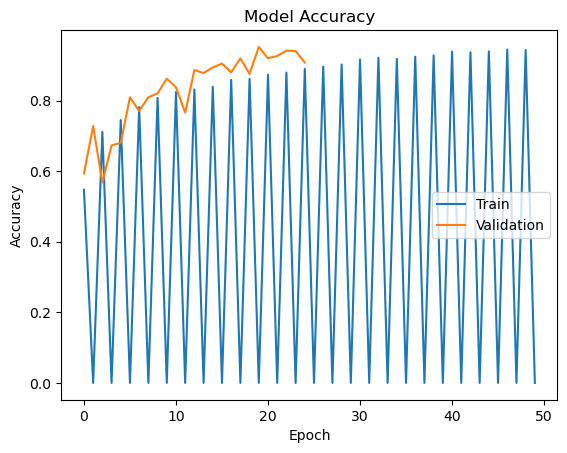

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

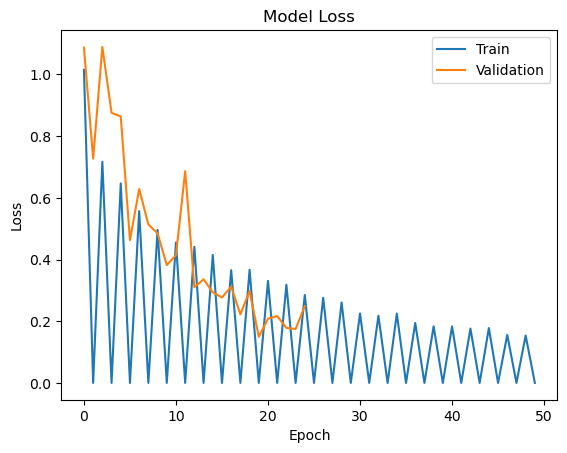

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [62]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.8420 - loss: 0.4100
Test Loss: 0.2530960440635681
Test Accuracy: 0.90625


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step


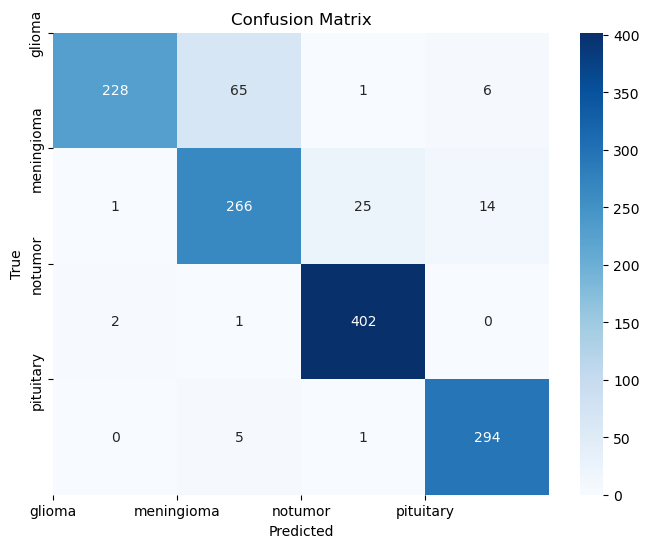

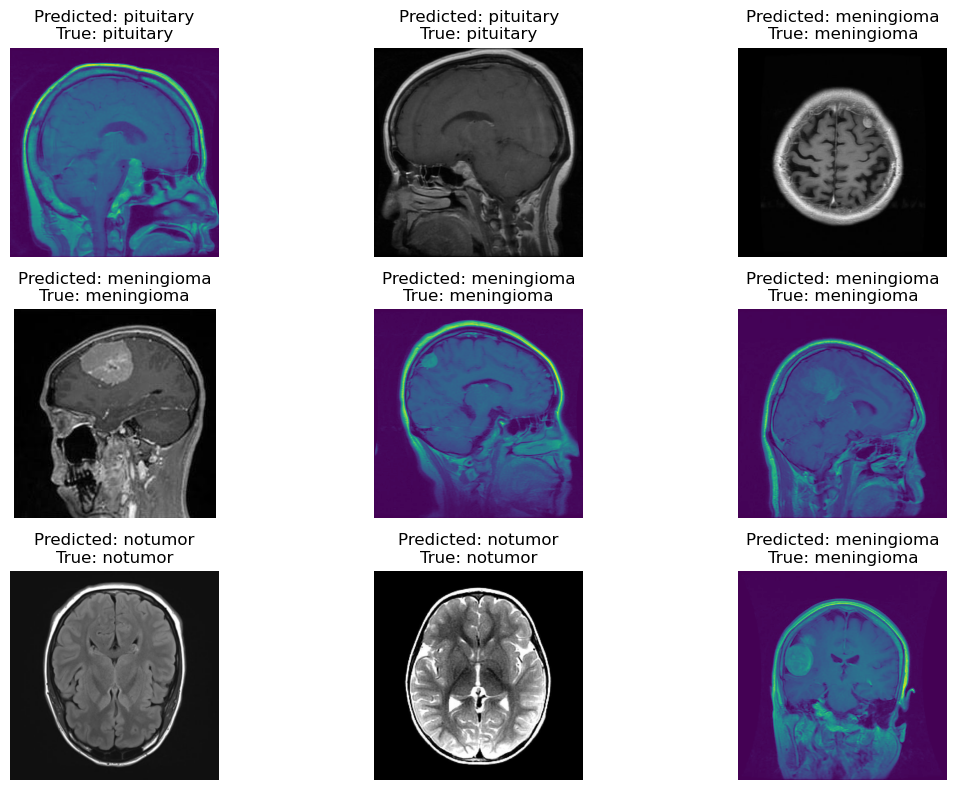

In [64]:
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

Class: glioma
Precision: 0.987012987012987
Recall: 0.76
F1-Score: 0.8587570621468925

Class: meningioma
Precision: 0.7893175074183977
Recall: 0.869281045751634
F1-Score: 0.8273716951788492

Class: notumor
Precision: 0.9370629370629371
Recall: 0.9925925925925926
F1-Score: 0.9640287769784174

Class: pituitary
Precision: 0.9363057324840764
Recall: 0.98
F1-Score: 0.9576547231270358



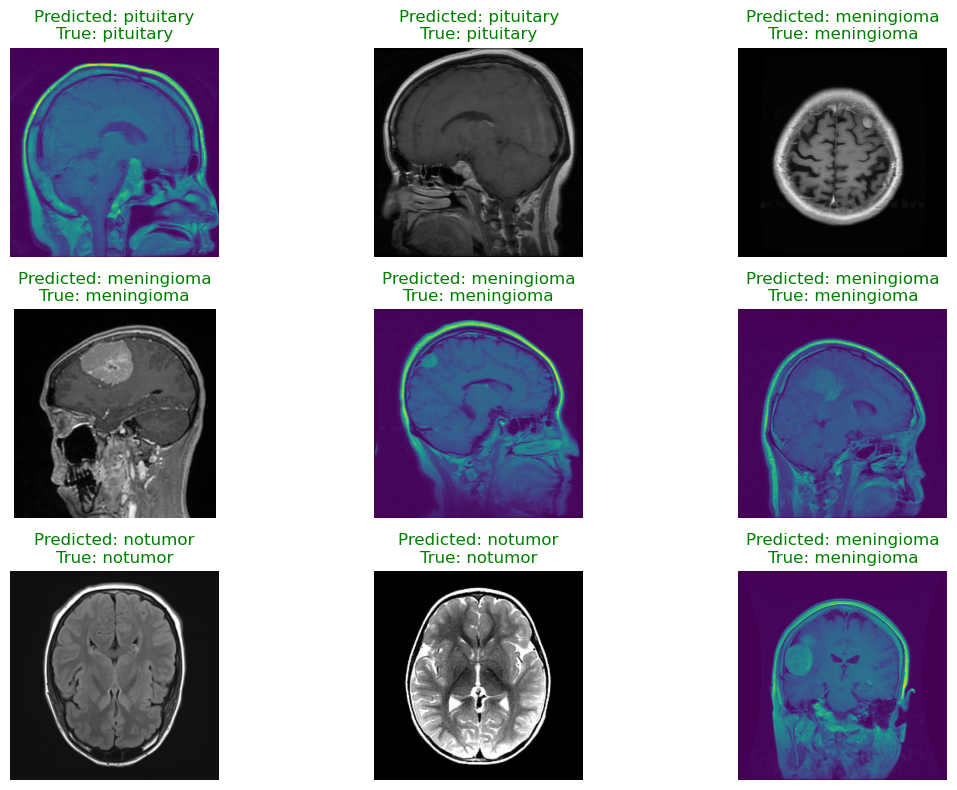

In [66]:
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [68]:
model.save("brain_tumor_detection_model.h5")